In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_excel("C:\\Users\\SREE RAMULU\\Downloads\\Data_Train.xlsx")

In [3]:
df1=df.copy()

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
 df.shape

(10683, 11)

In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df['Date_of_Journey'].str.split('/')

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [9]:
df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [10]:
df['Date_of_Journey'].str.split('/').str[1]

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Date_of_Journey, Length: 10683, dtype: object

In [11]:
df['Date_of_Journey'].str.split('/').str[2]

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [12]:
##Fetaure Engineering Process
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [14]:
# this is another method of splitting the date into 3 columns
df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [15]:
# here i am converting the data type imto int
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [17]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
# in arrival time column i am only considering the time
df['Arrival_Time'].str.split(' ')

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10683, dtype: object

In [20]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [21]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [22]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  object
 14  Arrival_min      10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [25]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [27]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [28]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10


In [29]:
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
 13  Dept_hour        10683 non-null  int32 
 14  Dept_min         10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [31]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [32]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [33]:
# i am replacing stops with numbers
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [34]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [35]:
df.drop('Route',axis=1,inplace=True)

In [36]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Duration         10683 non-null  object 
 4   Total_Stops      10682 non-null  float64
 5   Additional_Info  10683 non-null  object 
 6   Price            10683 non-null  int64  
 7   Date             10683 non-null  int32  
 8   Month            10683 non-null  int32  
 9   Year             10683 non-null  int32  
 10  Arrival_hour     10683 non-null  int32  
 11  Arrival_min      10683 non-null  int32  
 12  Dept_hour        10683 non-null  int32  
 13  Dept_min         10683 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(5)
memory usage: 876.5+ KB


In [38]:
df['Duration'].str.split(' ').str[0]

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Duration, Length: 10683, dtype: object

In [39]:
df['Duration'].str[0].str.split('h').str[0]

0        2
1        7
2        1
3        5
4        4
        ..
10678    2
10679    2
10680    3
10681    2
10682    8
Name: Duration, Length: 10683, dtype: object

In [40]:
df['duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [41]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50,4


In [42]:
df[df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327,6,3,2019,16,55,16,50,5m


In [43]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)
df['duration_hour']=df['duration_hour'].astype('int')
df.drop('Duration',axis=1,inplace=True)

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,21,35,16,50,4


In [45]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops        float64
Additional_Info     object
Price                int64
Date                 int32
Month                int32
Year                 int32
Arrival_hour         int32
Arrival_min          int32
Dept_hour            int32
Dept_min             int32
duration_hour        int32
dtype: object

In [46]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [48]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])

In [49]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,0,5,0.0,8,3897,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662,1,5,2019,13,15,5,50,7
2,4,2,1,2.0,8,13882,9,6,2019,4,25,9,25,19
3,3,3,0,1.0,8,6218,12,5,2019,23,30,18,5,5
4,3,0,5,1.0,8,13302,1,3,2019,21,35,16,50,4


In [50]:
df.shape

(10681, 14)

In [51]:
df.dtypes

Airline              int32
Source               int32
Destination          int32
Total_Stops        float64
Additional_Info      int32
Price                int64
Date                 int32
Month                int32
Year                 int32
Arrival_hour         int32
Arrival_min          int32
Dept_hour            int32
Dept_min             int32
duration_hour        int32
dtype: object

In [52]:
df[['Airline']]

,Airline
0,3
1,1
2,4
3,3
4,3
...,...
10678,0
10679,1
10680,4
10681,10


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  int32  
 1   Source           10681 non-null  int32  
 2   Destination      10681 non-null  int32  
 3   Total_Stops      10680 non-null  float64
 4   Additional_Info  10681 non-null  int32  
 5   Price            10681 non-null  int64  
 6   Date             10681 non-null  int32  
 7   Month            10681 non-null  int32  
 8   Year             10681 non-null  int32  
 9   Arrival_hour     10681 non-null  int32  
 10  Arrival_min      10681 non-null  int32  
 11  Dept_hour        10681 non-null  int32  
 12  Dept_min         10681 non-null  int32  
 13  duration_hour    10681 non-null  int32  
dtypes: float64(1), int32(12), int64(1)
memory usage: 751.0 KB


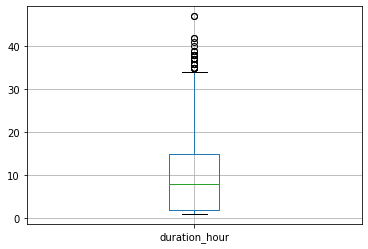

In [54]:
df.boxplot(column=["duration_hour"])
plt.show()

In [55]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [56]:
lowair,uppair=remove_outlier(df['Airline'])
df["Airline"]=np.where(df['Airline']>uppair,uppair,df['Airline'])
df["Airline"]=np.where(df['Airline']<lowair,lowair,df['Airline'])

In [57]:
lowair,uppair=remove_outlier(df['Source'])
df["Source"]=np.where(df['Source']>uppair,uppair,df['Source'])
df["Source"]=np.where(df['Source']<lowair,lowair,df['Source'])

In [58]:
lowair,uppair=remove_outlier(df['Total_Stops'])
df["Total_Stops"]=np.where(df['Total_Stops']>uppair,uppair,df['Total_Stops'])
df["Total_Stops"]=np.where(df['Total_Stops']<lowair,lowair,df['Total_Stops'])

In [59]:
lowair,uppair=remove_outlier(df['Additional_Info'])
df["Additional_Info"]=np.where(df['Additional_Info']>uppair,uppair,df['Additional_Info'])
df["Additional_Info"]=np.where(df['Additional_Info']<lowair,lowair,df['Additional_Info'])

In [60]:
lowair,uppair=remove_outlier(df['Price'])
df["Price"]=np.where(df['Price']>uppair,uppair,df['Price'])
df["Price"]=np.where(df['Price']<lowair,lowair,df['Price'])

In [61]:
lowair,uppair=remove_outlier(df['duration_hour'])
df["duration_hour"]=np.where(df['duration_hour']>uppair,uppair,df['duration_hour'])
df["duration_hour"]=np.where(df['duration_hour']<lowair,lowair,df['duration_hour'])

In [62]:
df['Total_Stops']=df['Total_Stops'].replace(to_replace=0, value=np.nan)
df['Total_Stops']=df['Total_Stops'].astype(float)
mean=df['Total_Stops'].mean()
df['Total_Stops'].replace(np.nan,mean,inplace=True)

In [63]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

222


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
683,4.0,2.0,1,2.000000,8.0,13376.0,1,6,2019,4,25,14,35,13.0
1061,1.5,2.0,1,2.000000,8.0,10231.0,21,5,2019,19,15,22,0,21.0
1348,1.5,2.0,1,2.000000,8.0,12392.0,18,5,2019,19,15,17,15,26.0
1418,4.0,2.0,1,2.000000,8.0,10368.0,6,6,2019,4,25,5,30,22.0
1674,3.0,0.5,5,1.220754,8.0,7303.0,24,3,2019,21,20,18,25,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,4.0,2.0,1,2.000000,8.0,12819.0,27,6,2019,12,35,23,5,13.0
10616,4.0,2.0,1,2.000000,8.0,13014.0,1,6,2019,12,35,9,40,26.0
10634,4.0,2.0,1,2.000000,8.0,11733.0,6,6,2019,12,35,9,40,26.0
10672,4.0,2.0,1,2.000000,8.0,11150.0,27,6,2019,19,0,23,5,19.0


In [64]:
df.drop_duplicates(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

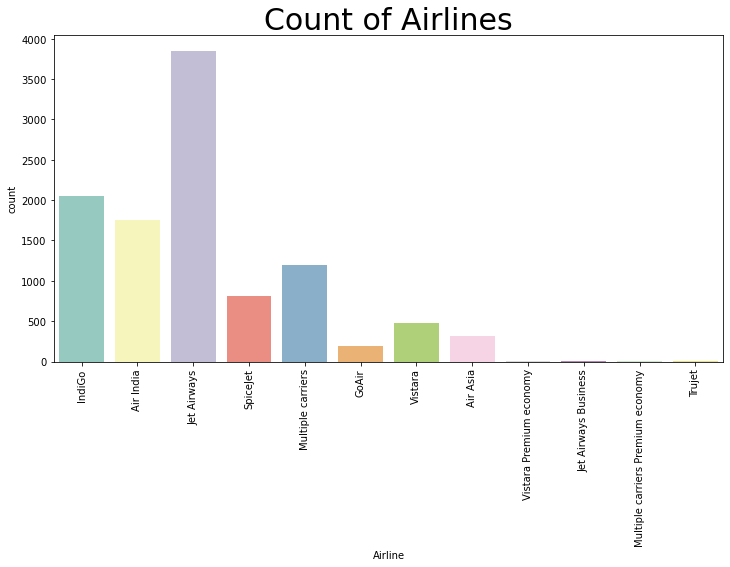

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(df1['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)

# OBSERVATION:
in obove graph i plotted count of each airline
for example,
1.indigo=2000,2.air india=1800etc


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

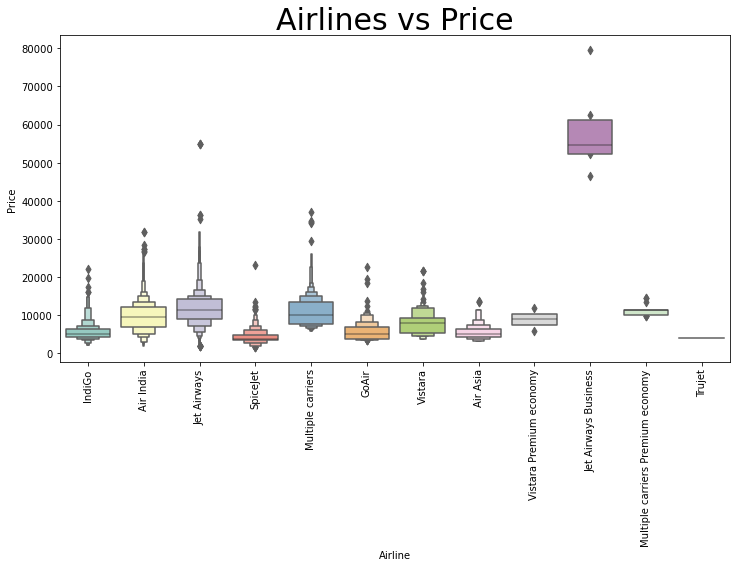

In [66]:
plt.figure(figsize=(12,6))
sns.boxenplot(df1['Airline'], df1['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)

# in above i have plotted minimum and maximum price of each airlines,we can easily figure out min and max price of each airlines

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

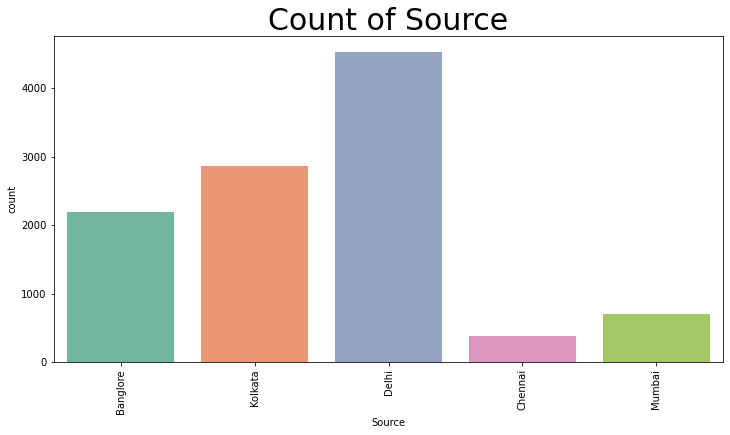

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(df1['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)

# this is the count of each source,this indicates how many times the  flights are taking off in each country

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

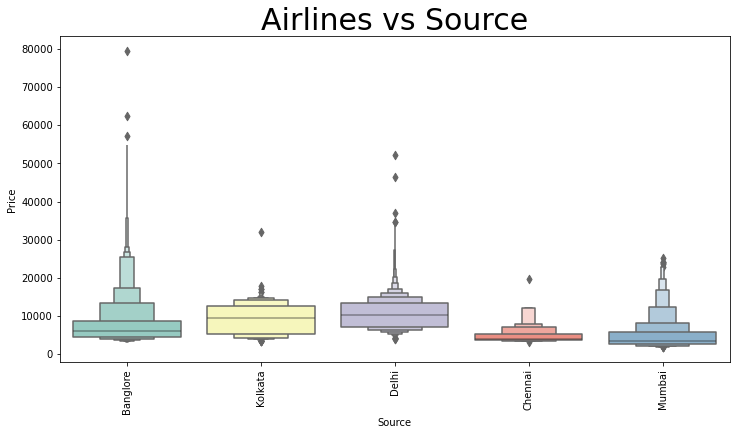

In [68]:
plt.figure(figsize=(12,6))
sns.boxenplot(df1['Source'], df1['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)

# this plot indicates in each city what are minimum and maximum prices of flight

In [69]:
##Fetaure Engineering Process
df1['Date']=df1['Date_of_Journey'].str.split('/').str[0]
df1['Month']=df1['Date_of_Journey'].str.split('/').str[1]
df1['Year']=df1['Date_of_Journey'].str.split('/').str[2]

In [70]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


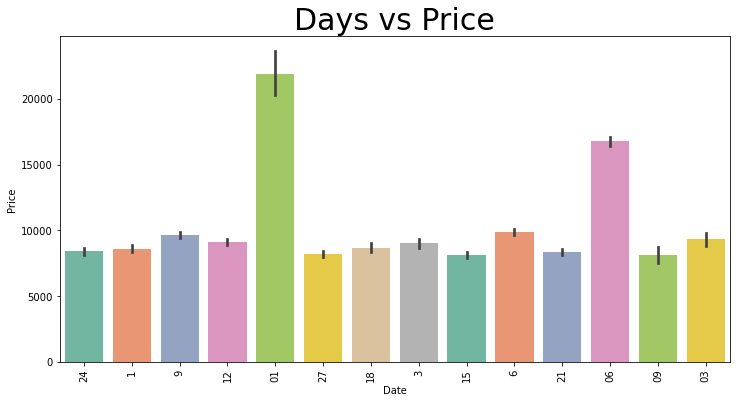

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(df1['Date'], df1['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

# this plot indicates prices according to date,here we can conclude that on 1st price is very high

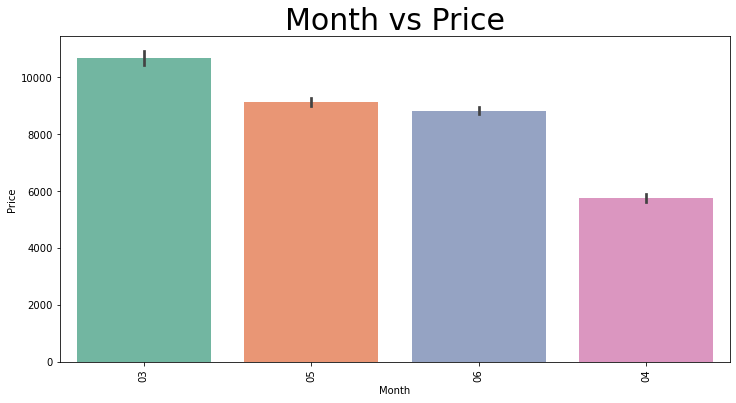

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(df1['Month'], df1['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

# in third month ticket prices are high

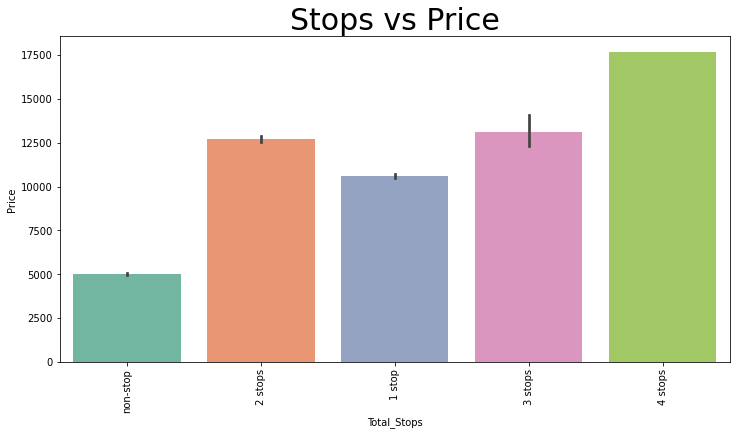

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(df1['Total_Stops'], df1['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

# if a particular plane have more 3 stops than the prices are high.

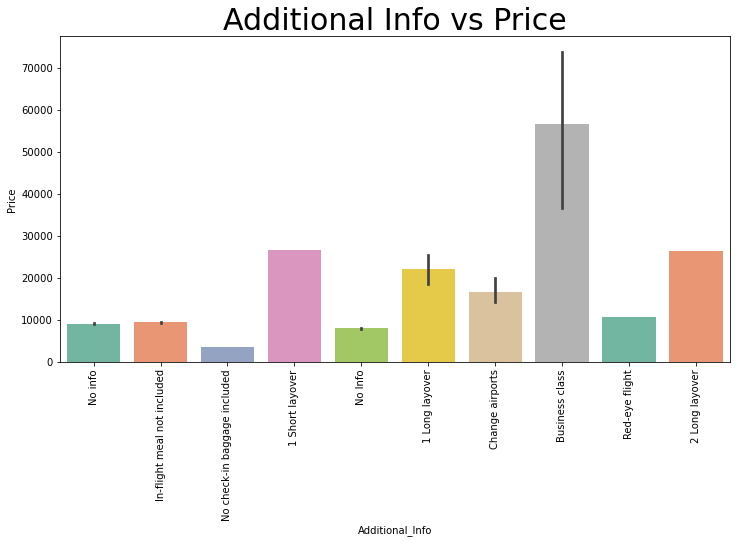

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(df1['Additional_Info'], df1['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

# bussiness class tickect prices are  very high

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor , VotingRegressor , RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRFRegressor
from sklearn.svm import SVR

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x=df.drop(['Price'],axis=1)
y=df[['Price']]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [80]:
m1=LinearRegression()

In [81]:
m1.fit(x_train,y_train)

LinearRegression()

In [82]:
m1.score(x_train,y_train)

0.3684396213245157

In [83]:
m1.score(x_test,y_test)

0.3667911049673944

In [84]:
from scipy.stats import zscore

In [85]:
xscaled=x.apply(zscore) # convert all attributes
xscaled.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
count,1.045900e+04,1.045900e+04,1.045900e+04,1.045900e+04,0.0,1.045900e+04,1.045900e+04,0.0,1.045900e+04,1.045900e+04,1.045900e+04,1.045900e+04,1.045900e+04
mean,-5.542729e-16,-3.026536e-16,-2.112545e-16,5.224279e-16,NaN,-3.458368e-17,-3.892946e-16,NaN,1.968871e-16,-3.115503e-17,-2.196987e-16,1.958680e-16,3.241105e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,NaN,1.000048e+00,1.000048e+00,NaN,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.562851e+00,-1.526879e+00,-9.719012e-01,-6.215682e-01,NaN,-1.471981e+00,-1.462739e+00,NaN,-1.953499e+00,-1.492055e+00,-2.178839e+00,-1.297017e+00,-1.083963e+00
25%,-4.707002e-01,-5.674023e-02,-9.719012e-01,-6.215682e-01,NaN,-8.814566e-01,-1.462739e+00,NaN,-7.863183e-01,-8.884578e-01,-7.817370e-01,-1.031287e+00,-9.636216e-01
50%,2.574006e-01,-5.674023e-02,-2.963436e-01,-6.215682e-01,NaN,-1.728269e-01,2.562258e-01,NaN,8.906744e-02,1.693812e-02,-2.578239e-01,3.163146e-02,-2.415742e-01
75%,2.574006e-01,9.233524e-01,3.792139e-01,4.627015e-02,NaN,8.901177e-01,1.115708e+00,NaN,8.185556e-01,6.205354e-01,9.646399e-01,8.288204e-01,6.008145e-01
max,1.349552e+00,1.903445e+00,2.405887e+00,3.916324e+00,NaN,1.598747e+00,1.115708e+00,NaN,1.402146e+00,1.827730e+00,1.837828e+00,1.626009e+00,2.947469e+00


In [86]:
x_train , x_test, y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1)

In [87]:
m2 =KNeighborsRegressor(n_neighbors=5)
m2.fit(x_train,y_train)

KNeighborsRegressor()

In [88]:
m2.score(x_train,y_train)

0.7867014242868166

In [89]:
m2.score(x_test,y_test)

0.6766766039799026

In [90]:
m3 =AdaBoostRegressor()
m3.fit(x_train,y_train)
m3.score(x_train,y_train)

0.6258486367331035

In [91]:
m3.score(x_test,y_test)

0.6334529810734763

In [92]:
m4 =GradientBoostingRegressor()
m4.fit(x_train,y_train)
m4.score(x_train,y_train)

0.7857063214183695

In [93]:
m4.score(x_test,y_test)

0.7803992107361818

In [94]:
m5 =RandomForestRegressor(n_estimators=30)
m5.fit(x_train,y_train)
m5.score(x_train,y_train)

0.9451347032211803

In [95]:
m5.score(x_test,y_test)

0.8141949178445289

In [96]:
m6 =DecisionTreeRegressor()
m6.fit(x_train,y_train)
m6.score(x_train,y_train)

0.9591015471701047

In [97]:
m6.score(x_test,y_test)

0.7222823009255106

In [98]:
m7 =XGBRFRegressor()
m7.fit(x_train,y_train)
m7.score(x_train,y_train)

0.7682758629383947

In [99]:
m7.score(x_test,y_test)

0.7636143072550721

In [100]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3.0,0.5,5,1.220754,8.0,3897.0,24,3,2019,1,10,22,20,2.0
1,1.5,3.0,0,2.000000,8.0,7662.0,1,5,2019,13,15,5,50,7.0
2,4.0,2.0,1,2.000000,8.0,13882.0,9,6,2019,4,25,9,25,19.0
3,3.0,3.0,0,1.000000,8.0,6218.0,12,5,2019,23,30,18,5,5.0
4,3.0,0.5,5,1.000000,8.0,13302.0,1,3,2019,21,35,16,50,4.0


# standardization techniques

In [101]:
from sklearn.preprocessing import StandardScaler
got=StandardScaler()
df['Price']=got.fit_transform(df[['Price']])

In [102]:
m2 =KNeighborsRegressor(n_neighbors=5)
m2.fit(x_train,y_train)
m2.score(x_train,y_train)

0.7867014242868166

In [103]:
m2.score(x_test,y_test)

0.6766766039799026

In [104]:
m3 =AdaBoostRegressor()
m3.fit(x_train,y_train)
m3.score(x_train,y_train)

0.6316850558601992

In [105]:
m3.score(x_test,y_test)

0.6302610300878722

In [106]:
m4 =GradientBoostingRegressor()
m4.fit(x_train,y_train)
m4.score(x_train,y_train)

0.7857063214183695

In [107]:
m4.score(x_test,y_test)

0.7803992107361819

In [108]:
m5 =RandomForestRegressor(n_estimators=30)
m5.fit(x_train,y_train)
m5.score(x_train,y_train)

0.9455829571130502

In [109]:
m5.score(x_test,y_test)

0.8078442170403367

In [110]:
m6 =DecisionTreeRegressor()
m6.fit(x_train,y_train)
m6.score(x_train,y_train)

0.9591015471701047

In [111]:
m6.score(x_test,y_test)

0.7212043405233008

In [112]:
m7 =XGBRFRegressor()
m7.fit(x_train,y_train)
m7.score(x_train,y_train)

0.7682758629383947

In [113]:
m7.score(x_test,y_test)

0.7636143072550721

# min max scalar

In [114]:
from sklearn.preprocessing import MinMaxScaler
got=MinMaxScaler()
df['Price']=got.fit_transform(df[['Price']])

In [115]:
m1=LinearRegression()
m1.fit(x_train,y_train)
m1.score(x_train,y_train)

0.3701850635132149

In [116]:
m1.score(x_test,y_test)

0.34753273220913217

In [117]:
m2 =KNeighborsRegressor(n_neighbors=5)
m2.fit(x_train,y_train)
m2.score(x_train,y_train)

0.7867014242868166

In [118]:
m2.score(x_test,y_test)

0.6766766039799026

In [119]:
m3 =AdaBoostRegressor()
m3.fit(x_train,y_train)
m3.score(x_train,y_train)

0.6151676192102556

In [120]:
m3.score(x_test,y_test)

0.6105912006360221

In [121]:
m4 =GradientBoostingRegressor()
m4.fit(x_train,y_train)
m4.score(x_train,y_train)

0.7857063214183695

In [122]:
m4.score(x_test,y_test)

0.7803992107361819

In [123]:
m5 =RandomForestRegressor(n_estimators=30)
m5.fit(x_train,y_train)
m5.score(x_train,y_train)

0.9451869302165946

In [124]:
m5.score(x_test,y_test)

0.8131509143221431

In [125]:
m6 =DecisionTreeRegressor()
m6.fit(x_train,y_train)
m6.score(x_train,y_train)

0.9591015471701047

In [126]:
m6.score(x_test,y_test)

0.7208943961460578

In [127]:
m7 =XGBRFRegressor()
m7.fit(x_train,y_train)
m7.score(x_train,y_train)

0.7682758629383947

In [128]:
m7.score(x_test,y_test)

0.7636143072550721

# MaxAbsScaler

In [129]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df['Price']=scaler.fit_transform(df[['Price']])

In [130]:
m1=LinearRegression()
m1.fit(x_train,y_train)
m1.score(x_train,y_train)

0.3701850635132149

In [131]:
m1.score(x_test,y_test)

0.34753273220913217

In [132]:
m2 =KNeighborsRegressor(n_neighbors=5)
m2.fit(x_train,y_train)
m2.score(x_train,y_train)

0.7867014242868166

In [133]:
m2.score(x_test,y_test)

0.6766766039799026

In [134]:
m3 =AdaBoostRegressor()
m3.fit(x_train,y_train)
m3.score(x_train,y_train)

0.6338388294900408

In [135]:
m3.score(x_test,y_test)

0.6413876218963122

In [136]:
m4 =GradientBoostingRegressor()
m4.fit(x_train,y_train)
m4.score(x_train,y_train)

0.7857063214183695

In [137]:
m4.score(x_test,y_test)

0.7803992107361819

In [138]:
m5 =RandomForestRegressor(n_estimators=30)
m5.fit(x_train,y_train)
m5.score(x_train,y_train)

0.9450293081880651

In [139]:
m5.score(x_test,y_test)

0.8124445034664104

In [140]:
m6 =DecisionTreeRegressor()
m6.fit(x_train,y_train)
m6.score(x_train,y_train)

0.9591015471701047

In [141]:
m6.score(x_test,y_test)

0.7208378923465406

In [142]:
m7 =XGBRFRegressor()
m7.fit(x_train,y_train)
m7.score(x_train,y_train)

0.7682758629383947

In [143]:
m7.score(x_test,y_test)

0.7636143072550721

# Robust Scaler

In [144]:
from sklearn.preprocessing import RobustScaler
scaler1 = RobustScaler()
df['Price']=scaler1.fit_transform(df[['Price']])

In [145]:
m1=LinearRegression()
m1.fit(x_train,y_train)
m1.score(x_train,y_train)

0.3701850635132149

In [146]:
m1.score(x_test,y_test)

0.34753273220913217

In [147]:
m2 =KNeighborsRegressor(n_neighbors=5)
m2.fit(x_train,y_train)
m2.score(x_train,y_train)

0.7867014242868166

In [148]:
m2.score(x_test,y_test)

0.6766766039799026

In [149]:
m3 =AdaBoostRegressor()
m3.fit(x_train,y_train)
m3.score(x_train,y_train)

0.6188283159301198

In [150]:
m3.score(x_test,y_test)

0.616201072811075

In [151]:
m4 =GradientBoostingRegressor()
m4.fit(x_train,y_train)
m4.score(x_train,y_train)

0.7857063214183695

In [152]:
m4.score(x_test,y_test)

0.7803992107361818

In [153]:
m5 =RandomForestRegressor(n_estimators=30)
m5.fit(x_train,y_train)
m5.score(x_train,y_train)

0.9448297235835735

In [154]:
m5.score(x_test,y_test)

0.8148249878407914

In [155]:
m6 =DecisionTreeRegressor()
m6.fit(x_train,y_train)
m6.score(x_train,y_train)

0.9591015471701047

In [156]:
m6.score(x_test,y_test)

0.7244584966780414

In [157]:
m7 =XGBRFRegressor()
m7.fit(x_train,y_train)
m7.score(x_train,y_train)

0.7682758629383947

In [158]:
m7.score(x_test,y_test)

0.7636143072550721

# Quantile Transformer Scaler

In [159]:
from sklearn.preprocessing import QuantileTransformer
scaler2 = QuantileTransformer()
df['Price']=scaler2.fit_transform(df[['Price']])

In [160]:
m1=LinearRegression()
m1.fit(x_train,y_train)
m1.score(x_train,y_train)

0.3701850635132149

In [161]:
m1.score(x_test,y_test)

0.34753273220913217

In [162]:
m2 =KNeighborsRegressor(n_neighbors=5)
m2.fit(x_train,y_train)
m2.score(x_train,y_train)

0.7867014242868166

In [163]:
m2.score(x_test,y_test)

0.6766766039799026

In [164]:
m3 =AdaBoostRegressor()
m3.fit(x_train,y_train)
m3.score(x_train,y_train)

0.6283408725975905

In [165]:
m3.score(x_test,y_test)

0.6306503187978066

In [166]:
m4 =GradientBoostingRegressor()
m4.fit(x_train,y_train)
m4.score(x_train,y_train)

0.7857063214183695

In [167]:
m4.score(x_test,y_test)

0.7803992107361818

In [168]:
m5 =RandomForestRegressor(n_estimators=30)
m5.fit(x_train,y_train)
m5.score(x_train,y_train)

0.945070604996876

In [169]:
m5.score(x_test,y_test)

0.8073259102855509

In [170]:
m6 =DecisionTreeRegressor()
m6.fit(x_train,y_train)
m6.score(x_train,y_train)

0.9591015471701047

In [171]:
m6.score(x_test,y_test)

0.7238229009363519

In [172]:
m7 =XGBRFRegressor()
m7.fit(x_train,y_train)
m7.score(x_train,y_train)

0.7682758629383947

In [173]:
m7.score(x_test,y_test)

0.7636143072550721

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
param_grid={
    'max_depth':[8,9],
    'max_features':[8,9],
    'min_samples_leaf':[2,1,0,5],
    'min_samples_split':[1,9]
}

In [176]:
dt=DecisionTreeRegressor(random_state=1)

In [177]:
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=3,return_train_score=True)

In [178]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [8, 9], 'max_features': [8, 9],
                         'min_samples_leaf': [2, 1, 0, 5],
                         'min_samples_split': [1, 9]},
             return_train_score=True)

In [179]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

In [180]:
best_grid=grid_search.best_estimator_
best_grid.score(x_test,y_test)

0.7862914940021921

In [181]:
best_grid.score(x_train,y_train)

0.8231082814543711

In [182]:
m6 =DecisionTreeRegressor(max_depth=9,max_features=8,min_samples_leaf=2,min_samples_split=9)
m6.fit(x_train,y_train)
m6.score(x_train,y_train)

0.8124750621034167

In [183]:
m6.score(x_test,y_test)

0.7875190231777514

In [184]:
param_grid={
    

    'n_estimators':[10,20],
    'learning_rate':[.0,1,6,7,8],
    'loss':['linear','square','exponential']
    
}

In [185]:
adb=AdaBoostRegressor()

In [186]:
grid_search=GridSearchCV(estimator=adb,param_grid=param_grid,cv=3,return_train_score=True)

In [187]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.0, 1, 6, 7, 8],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20]},
             return_train_score=True)

In [188]:
grid_search.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 10}

In [189]:
best_grid=grid_search.best_estimator_
best_grid.score(x_test,y_test)

0.6534915698463297

In [190]:
best_grid.score(x_train,y_train)

0.6566393788442038

# Cross Validation Techniques

In [191]:
from sklearn.model_selection import cross_val_score,KFold

In [192]:
knn=KNeighborsRegressor()
kf=KFold(n_splits=5)
score=cross_val_score(knn,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.66326095 0.66399055 0.65812387 0.63595251 0.63897122]
Average Cross Validation score :0.6520598226152257


# StratifiedKFold 

In [193]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
bio=XGBRFRegressor()
stratifiedkf=StratifiedKFold(n_splits=3)
score=cross_val_score(bio,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.75447782 0.76960861 0.75362582]
Average Cross Validation score :0.7592374178095787
